<h1><b>Attendance Using Face Recognition <br></b></h1>

<hr>
<h1><u><b>My Introduction:</b></u></h1>

Hi my name is Ali Raza and I am doing BSCS from Sir Syed University of Engineering & Technology (currently in 4th Semester)

This is my first ever Machine Learning Project

Project Overview:
* 1. Importing Libraries
  > If you don't have face_recognition install it using following command:
  > `!pip install face_recognition`
* 2. Mount Google Drive
* 3. Encoding Known Faces
* 4. Function to mark attendance
* 5. Face Detection
* 6. Making Attendance Sheet .csv file
  > Cleaning Unnecessary things for making the final attendance sheet


# **1. Importing Libaries**


In [1]:
import face_recognition 
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
import cv2
import os
import glob
from datetime import datetime
import pandas as pd

# **2. Mounting Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Encoding Known Faces**

In [3]:
face1 = face_recognition.load_image_file("/content/drive/My Drive/datasets/StudentFaces/Known/Elon Musk.jpg")
face1_encoding = face_recognition.face_encodings(face1)[0]

face2 = face_recognition.load_image_file("/content/drive/My Drive/datasets/StudentFaces/Known/Tobey.jpg")
face2_encoding = face_recognition.face_encodings(face2)[0]

face3 = face_recognition.load_image_file("/content/drive/My Drive/datasets/StudentFaces/Known/Robert Downjey Jr.jpg")
face3_encoding = face_recognition.face_encodings(face3)[0]

face4 = face_recognition.load_image_file("/content/drive/My Drive/datasets/StudentFaces/Known/Tom Cruise.jpg")
face4_encoding = face_recognition.face_encodings(face4)[0]

face5 = face_recognition.load_image_file("/content/drive/My Drive/datasets/StudentFaces/Known/Tom Holland.jpg")
face5_encoding = face_recognition.face_encodings(face5)[0]

known_face_encodings = [
    face1_encoding,
    face2_encoding,
    face3_encoding,
    face4_encoding,
    face5_encoding,
]

known_face_names = [
    "Elon Musk, Roll#1",
    "Tobey Maguire, Roll#2",
    "Robert Downy Jr., Roll#3",
    "Tom Cruise, Roll#4",
    "Tom Holland, Roll#5"
]

#**4. Function to open a csv file and mark attendance**

In [4]:
from datetime import datetime
now=datetime.now()
def markAttendance(name):
    with open('/content/drive/My Drive/datasets/StudentFaces/attendance_list.csv','r+') as myfile: #Opening file for reading and writing
        lines = myfile.readlines()  # All rows will be saved in All lines
        if lines == []:
          lines.append(f"Name, Roll#, Time, Date")
        attendanceList = [] #list to store entry
        for line in lines:
            entry = line.split(',')
            attendanceList.append(entry[0])
            if name not in attendanceList:
              now = datetime.now()
              dateTimetString = now.strftime('%d/%b/%Y, %H:%M:%S')
              myfile.writelines(f'\n{name},{dateTimetString}')
              break
            

# **5. Face Detection**

Don't have webcam so can't do the real time face-detection but it's easy to do also
By adding few lines in code below

Robert Downy Jr., Roll#3


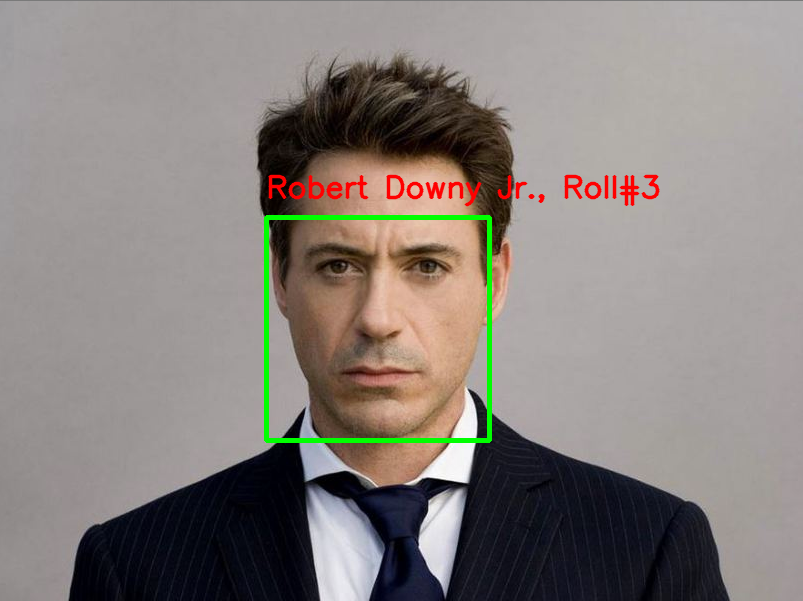

Tom Cruise, Roll#4


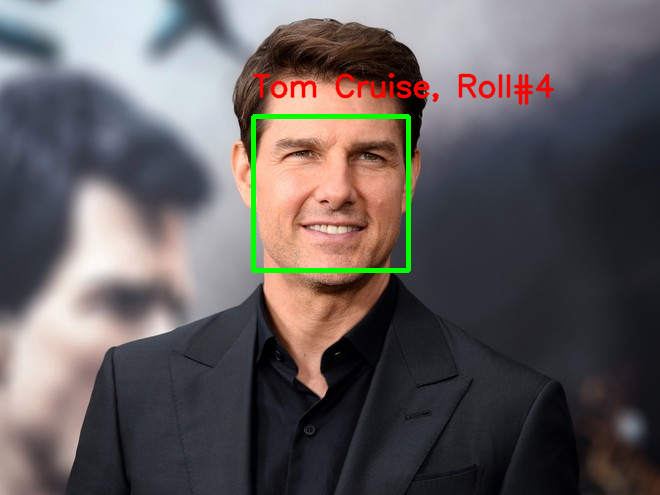

Tobey Maguire, Roll#2


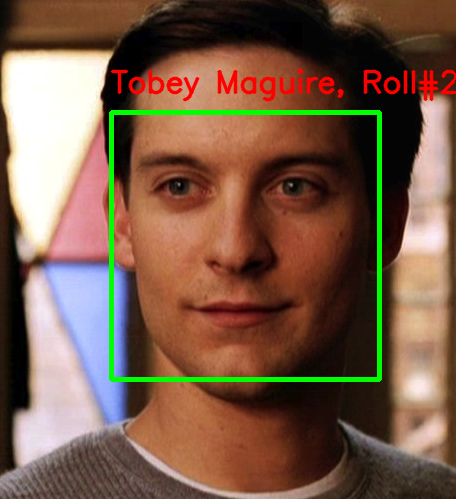

Tom Holland, Roll#5


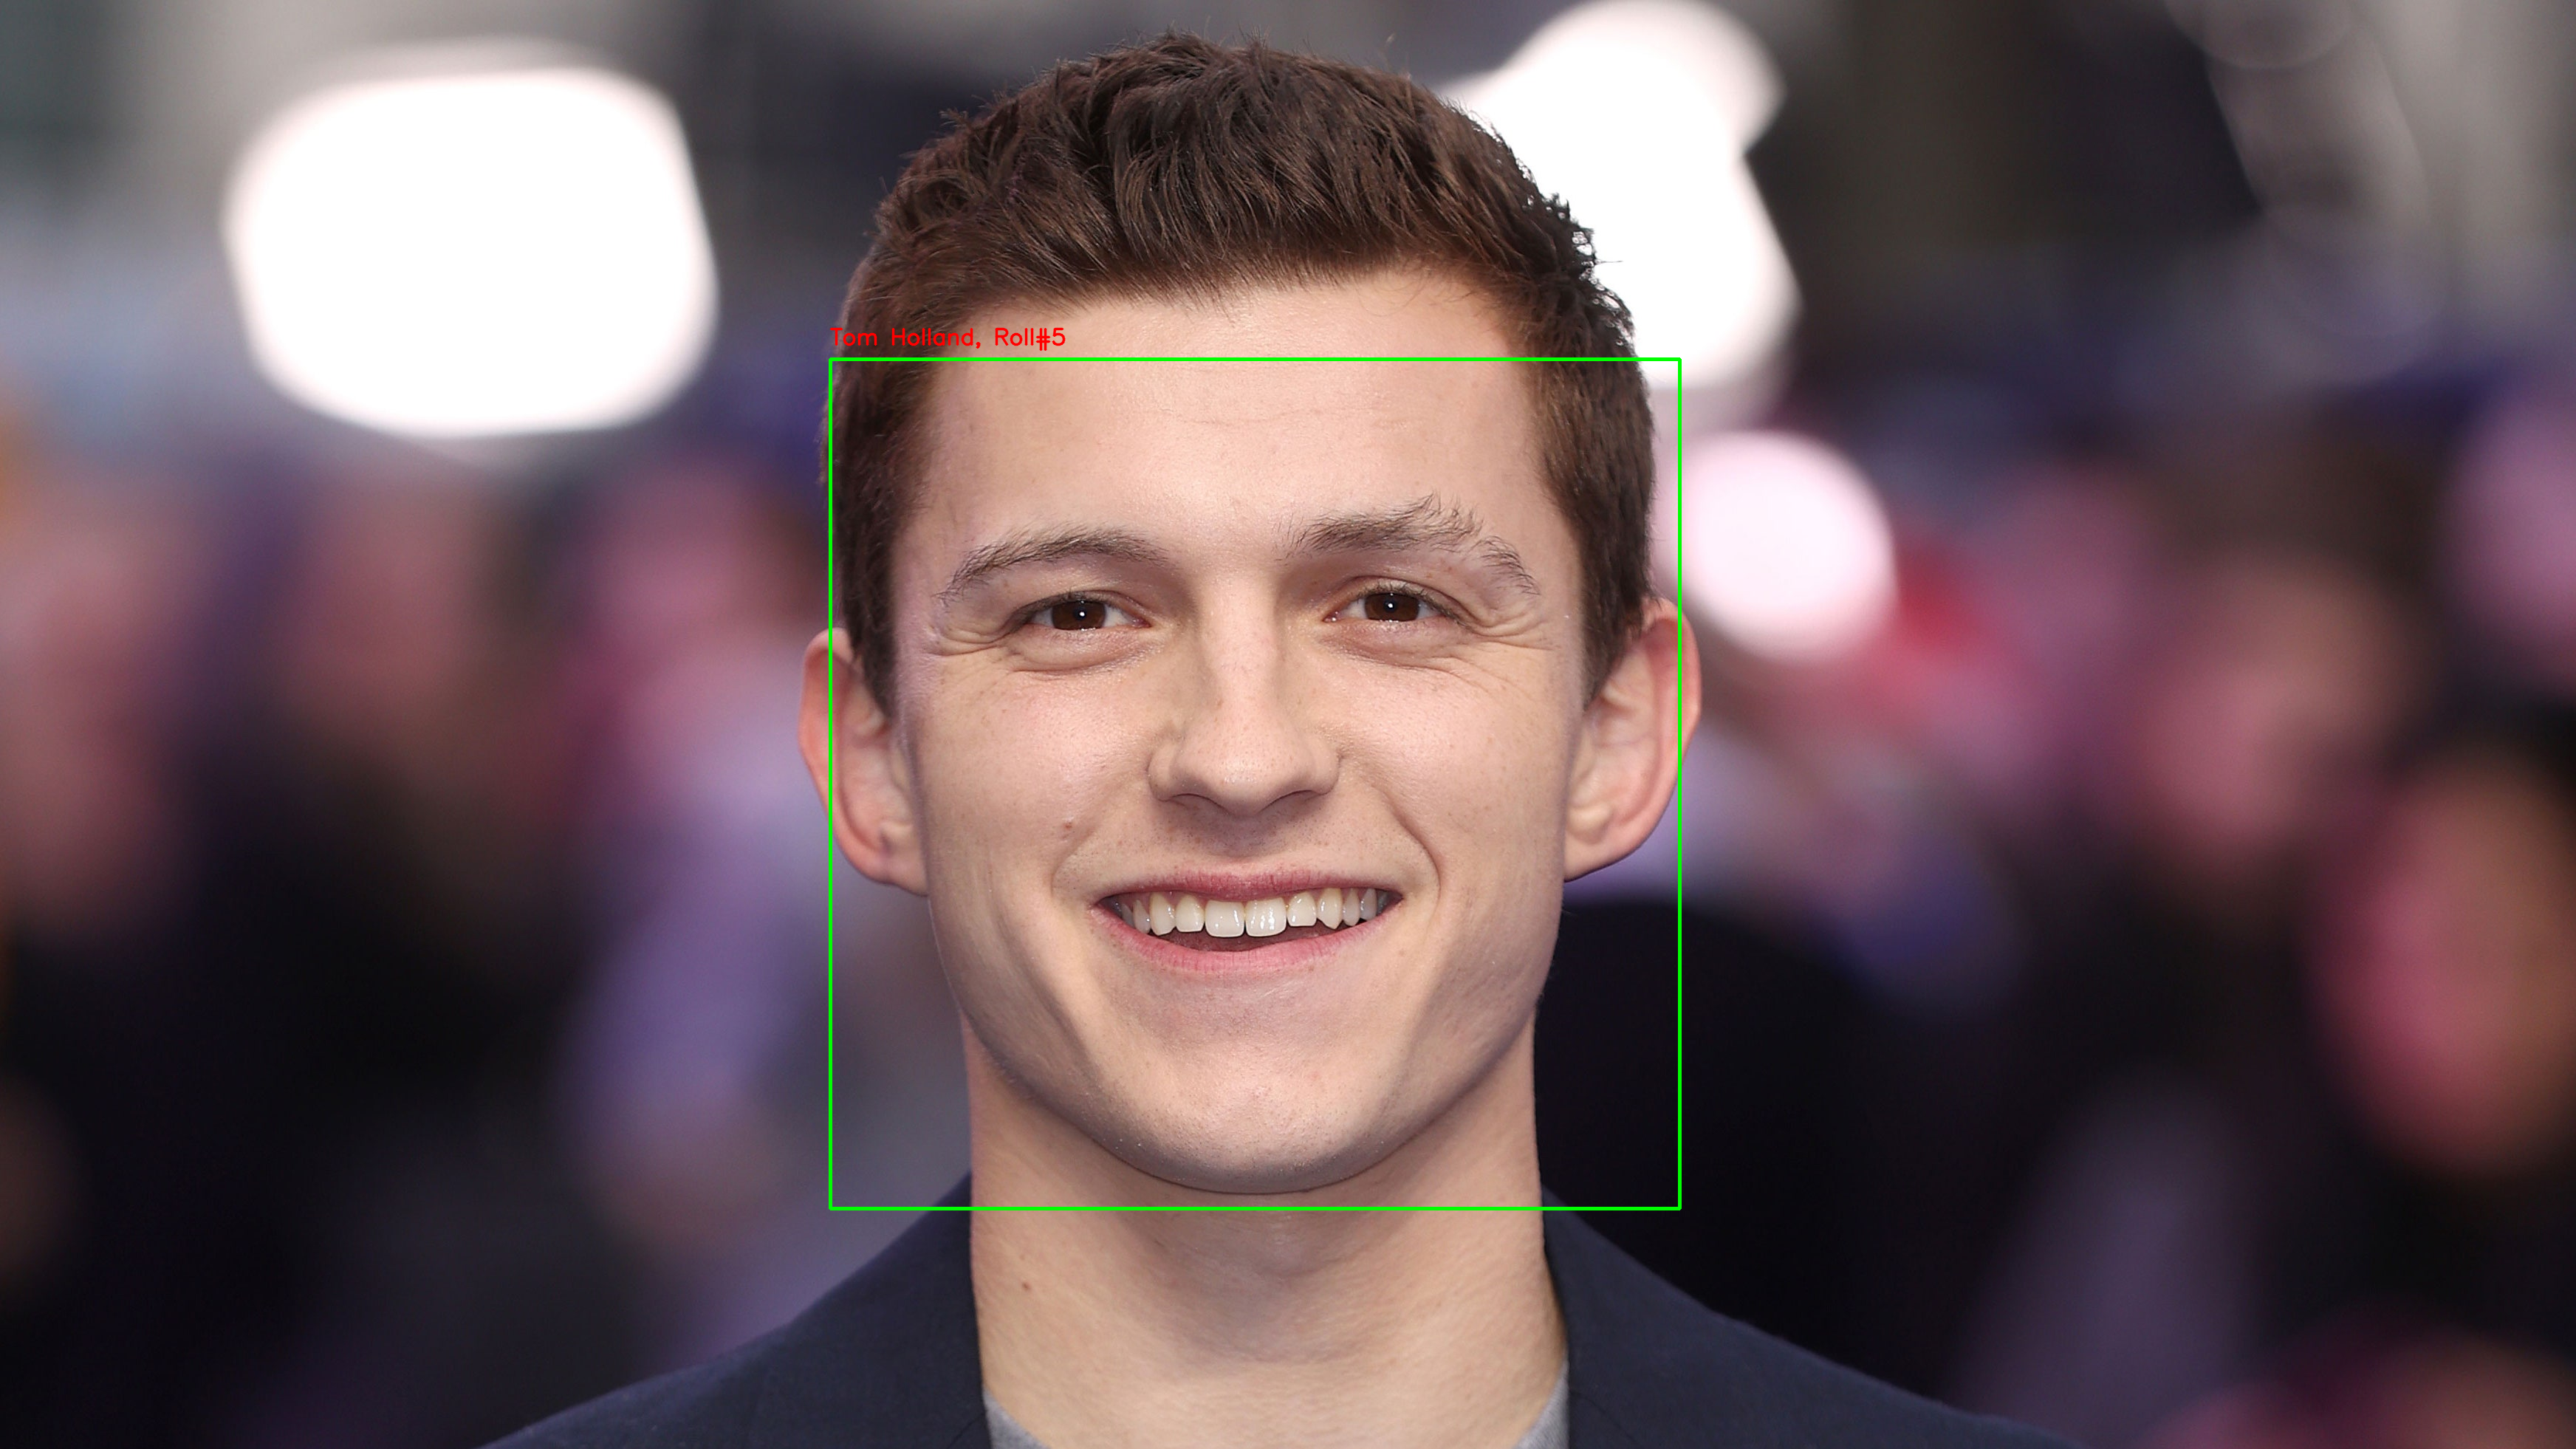

Elon Musk, Roll#1


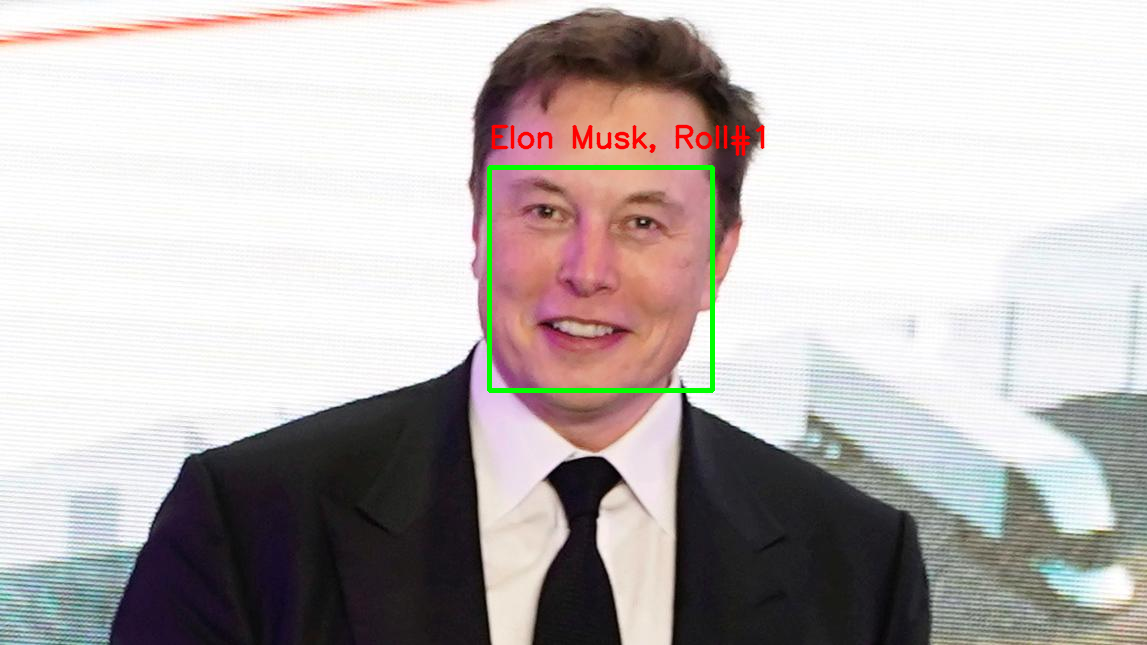

Unknown, Not Found


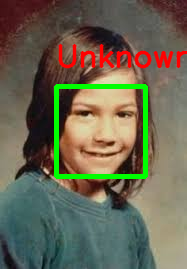

Unknown, Not Found


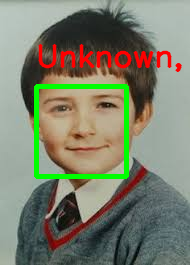

In [5]:
#Directory of all unknown people images  
images_dir = "/content/drive/My Drive/datasets/StudentFaces/Unknown/" 

all_images_path = os.path.join(images_dir,'*g') 

files = glob.glob(all_images_path)  

#loop for fetching and detecting all unknown images at a time
for i in files:
  
  unknown_image = face_recognition.load_image_file(i)
  unknown_image_to_draw = cv2.imread(i)

  face_locations = face_recognition.face_locations(unknown_image)
  face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

  pil_image = Image.fromarray(unknown_image)
  draw = ImageDraw.Draw(pil_image)


  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown, Not Found"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    markAttendance(name)


  # display(pil_image)
  cv2_imshow(unknown_image_to_draw)

# **6. Making Attendance Sheet**

In [6]:
import pandas as pd #for reading csv and making dataframe

attendance_sheet = pd.read_csv("/content/drive/My Drive/datasets/StudentFaces/attendance_list.csv",header=None)

#Assigning Columns to attendance sheet to give it a meaningful view
attendance_sheet.columns = ["Name" ,"Roll#","Date", "Time"]

"""
Dropping Duplicates of a face marked present twice except the unknown ones and it will not drop if the data is not the same
For eg Today is the date 11 Nov and Tomorrow is 12 Nov so it will not drop the same person if it register tomorrow but if tomorrow duplicates found then those will be dropped.

"""
attendance_sheet[attendance_sheet["Name"] != "Unknown"] = attendance_sheet.drop_duplicates(subset=['Name','Date'])

In [7]:
from collections import Counter #To Count Students Present
a = dict(Counter(attendance_sheet['Name']))

In [8]:
attendance_list = []
for name,frequency in a.items():
  attendance_list.append([name,frequency])


# **Making another csv for final attendance sheet with all the necessary details**

In [9]:
#Converting attendance_list to dataframe and assigning it to attendance_df
attendance_df = pd.DataFrame(attendance_list)

#Assgining Column Names
attendance_df.columns=["Name","Class Taken"]

#Dropping None Values if exist
attendance_df.dropna(inplace=True)

In [10]:
# if someone has high attendance cuz of extra class so the if statement will run but if not then the else statement will execute
if(attendance_df['Class Taken'].max()>5):
  attendance_df.insert(2,'Attendance Percentage',(attendance_df['Class Taken']*100)/attendance_df['Class Taken'].max())
else:
  attendance_df.insert(2,'Attendance Percentage',(attendance_df['Class Taken']*100)/5)

In [11]:
#printing Final Attendance List attendance_df 
print(attendance_df)

#Counting Total Person Marked Present
print('Total Students Present: ',attendance_df['Name'].count())

               Name  Class Taken  Attendance Percentage
0  Robert Downy Jr.            1                   20.0
1        Tom Cruise            1                   20.0
2     Tobey Maguire            1                   20.0
3       Tom Holland            1                   20.0
4         Elon Musk            1                   20.0
5           Unknown            4                   80.0
Total Students Present:  6


In [12]:
#Creating a csv file of final attendance in my google drive
attendance_df.to_csv('/content/drive/My Drive/datasets/StudentFaces/FinalAttendanceList.csv',index=False)

In [13]:
with open("/content/drive/My Drive/datasets/StudentFaces/FinalAttendanceList.csv",'r+') as attendance_record:
  lines = attendance_record.readlines()
  for line in lines:
    #Writing a line in final attendance csv of Total Present Students
    attendance_record.writelines(f"Total Students Present: ," + str (attendance_df['Name'].count()))
    break

In [14]:
pd.read_csv('/content/drive/My Drive/datasets/StudentFaces/FinalAttendanceList.csv').fillna('') #.fillna('') fill the Empty Space in dataset

Name  Class Taken Attendance Percentage
0          Robert Downy Jr.            1                    20
1                Tom Cruise            1                    20
2             Tobey Maguire            1                    20
3               Tom Holland            1                    20
4                 Elon Musk            1                    20
5                   Unknown            4                    80
6  Total Students Present:             6